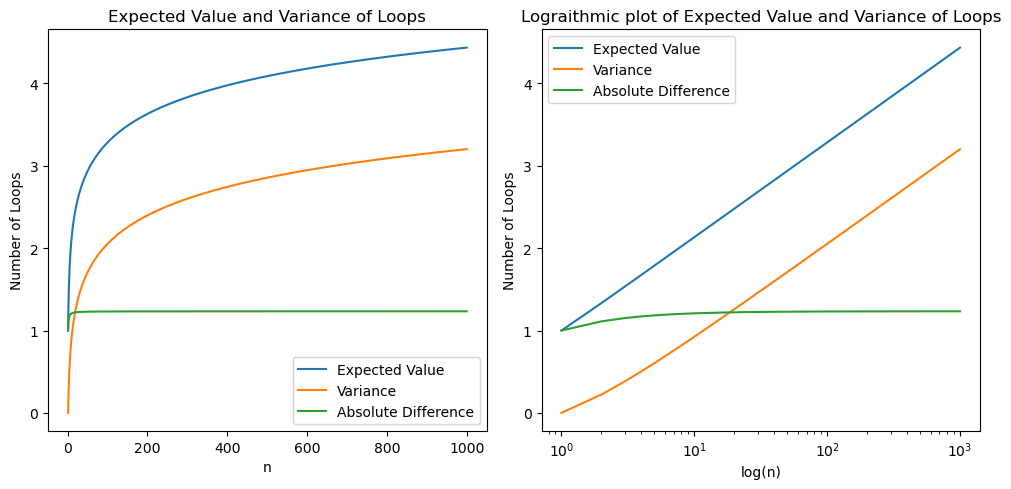

In [1]:
import numpy as np    #Import usual libraries
import matplotlib.pyplot as plt
import random

values = np.arange(1, 1001) # Define the range of n values for the plot
expectedvalue = np.array([np.sum(1 / (2 * values[:i] - 1)) for i in range(1, len(values) + 1)]) # Calculate the expected value for each n
variance = np.array([np.sum(1 / (2 *values[:i] - 1) - (1 / (2 * values[:i] - 1)) ** 2) for i in range(1, len(values) + 1)]) # Calculate the variance for each n
#Note this stores each as an array to plot easier and iterates across all values in the range.

absolutedifference = expectedvalue - variance # Calculate the absolute difference between expected value and variance for each n

plt.figure(figsize=(10, 5))   #Usual parameters for plotting graphs and in this case we plot two next to each other to show normal graph and logarithmic plot
plt.subplot(1, 2, 1)
plt.plot(values, expectedvalue, label='Expected Value') # We plot all three lines to show the constant difference emerging between expected value - varaiance
plt.plot(values, variance, label='Variance')
plt.plot(values, absolutedifference, label='Absolute Difference')
plt.xlabel('n')
plt.ylabel('Number of Loops') #Usual titles and plot legend
plt.title('Expected Value and Variance of Loops')
plt.legend()

plt.subplot(1, 2, 2) # Starts the second graph with the same size 
plt.semilogx(values, expectedvalue, label='Expected Value')
plt.semilogx(values, variance, label='Variance') # Plot with logarithmic x-scale and same y scale
plt.semilogx(values, absolutedifference, label='Absolute Difference')
plt.xlabel('log(n)')
plt.ylabel('Number of Loops') #Usual titles for the graphs
plt.title('Lograithmic plot of Expected Value and Variance of Loops')
plt.legend()


plt.tight_layout()
plt.show() # Plot the actual graphs!!

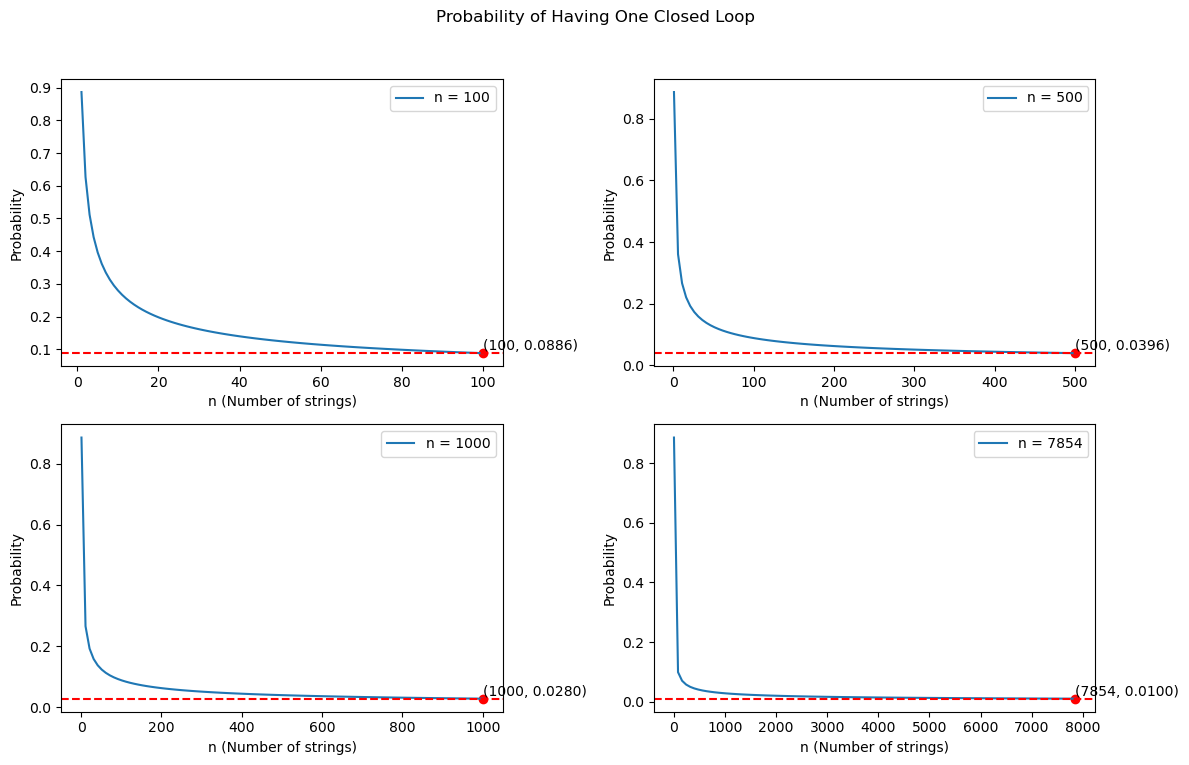

In [2]:
def probabilityfunction(n):
    return np.sqrt(np.pi / (4 * n)) # This was the function we found that calculated the probability for 1 closed loop for any n value

specificvalues = [100, 500, 1000, 7854] #These were the n values I wanted to try however, I played around with different ones.
probabilities = [probabilityfunction(n) for n in specificvalues] # We compute the probabilities for these values

fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # Plotting a subplot of 4 graphs for the different games
fig.suptitle('Probability of Having One Closed Loop')

for i, ax in enumerate(axs.flat): # Using our work from previous labs I wanted to plot on the graphs the red line as to what the probability of one closed loop was
    n = specificvalues[i] #Form of parametric equation to obtain the x values for the curve. For larger amounts of points being plotted my computer started to take too long to run
    x = np.linspace(1, n, 100)
    y = probabilityfunction(x) #Plot the probability function
    ax.plot(x, y, label=f'n = {n}')
    ax.axhline(probabilities[i], color='red', linestyle='--') #Plots the red line across and labels the coordinates allowing us to see the probability
    ax.scatter(n, probabilities[i], color='red')
    ax.text(n, probabilities[i], f'({n}, {probabilities[i]:.4f})', ha='left', va='bottom')
    ax.set_xlabel('n (Number of strings)')
    ax.set_ylabel('Probability') #Usual labels for aesthetics
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #These dimensions were put in for presenting my graphs in Latex
plt.show()

In [3]:
def tie(strings, end1, end2): #We define our tie function to decide what is a closed loop and what isn't
    for string in strings: # We first do the scenario if the ends are from the same string
        if end1 in string and end2 in string: #Create an if loop to check if both are in string and then we remove string and add 1 to counter
            strings.remove(string)
            return strings, 1 #Return updated strings bag

    newstring = []  # Now we treat ends from different strings of which we have a few scenarios
    combinedstring = [] #We first create two empty arrays. Whenever we combine two strings we make a new string and so I wanted to store these in here so I can manipulate how the new string is presented
    for string in strings: #Iterate the game
        if end1 in string: #Our first and second part of the loop involves different ends being selected and so it removes the old string in both cases
            string.remove(end1)
            newstring.extend(string) #The extend function allowed for the order in which we combine strings to be maintained and simplify the vectors down
        elif end2 in string:
            string.remove(end2) # I realised this method however was not good enough for my 2 player game later on where I had to measure length so I knew this would have to change
            newstring.extend(string)
        else:
            combinedstring.append(string) #This is where the two ends are appended together and stored in combined strings so that the next iteration of the game can be played.
    combinedstring.append(newstring)
    return combinedstring, 0 #We return the updated game and obviously no closed loops here will be added

def playgame(number): #Now we can define the actual game
    strings = [[i*2+1, i*2+2] for i in range(number)] # We have 2 ends to each string and we want to represent these with consecutive numbers for ease
    closedloops = 0 # Set our closed loop counter to 0

    while len(strings) > 1: # We play the game until the length of strings is 1 i.e. we have 2 ends and we deal with this case separately
        print(f"Current state: {strings}") #At each stage we print the current state of strings so we can see what's going on
        end1 = int(input("Enter first end: ")) #User input of two ends to append, obviously the game is random but this gives a chance to experiment with possibilities
        end2 = int(input("Enter second end: "))
        strings, loops = tie(strings, end1, end2) #We then run the tie function to check if the ends are the same or different
        closedloops += loops #We add to the loop counter if it is the first scenario
 
    closedloops += 1 # Final step with only one string left we always add 1 loop, I had to do it this way as I tried for ages trying to incorporate it in while loop above with no success
    print("All ends tied. Game Complete") # Once this is done we print the end statement and print the number of closed loops
    print("Number of closed loops:", closedloops)
    
if __name__ == "__main__":
    number = int(input("Enter number of strings: ")) #User inputs the number of strings
    playgame(number) #Play the game!!!

Enter number of strings:  5


Current state: [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]


Enter first end:  1
Enter second end:  3


Current state: [[5, 6], [7, 8], [9, 10], [2, 4]]


Enter first end:  5
Enter second end:  6


Current state: [[7, 8], [9, 10], [2, 4]]


Enter first end:  7
Enter second end:  2


Current state: [[9, 10], [8, 4]]


Enter first end:  9
Enter second end:  8


All ends tied. Game Complete
Number of closed loops: 2


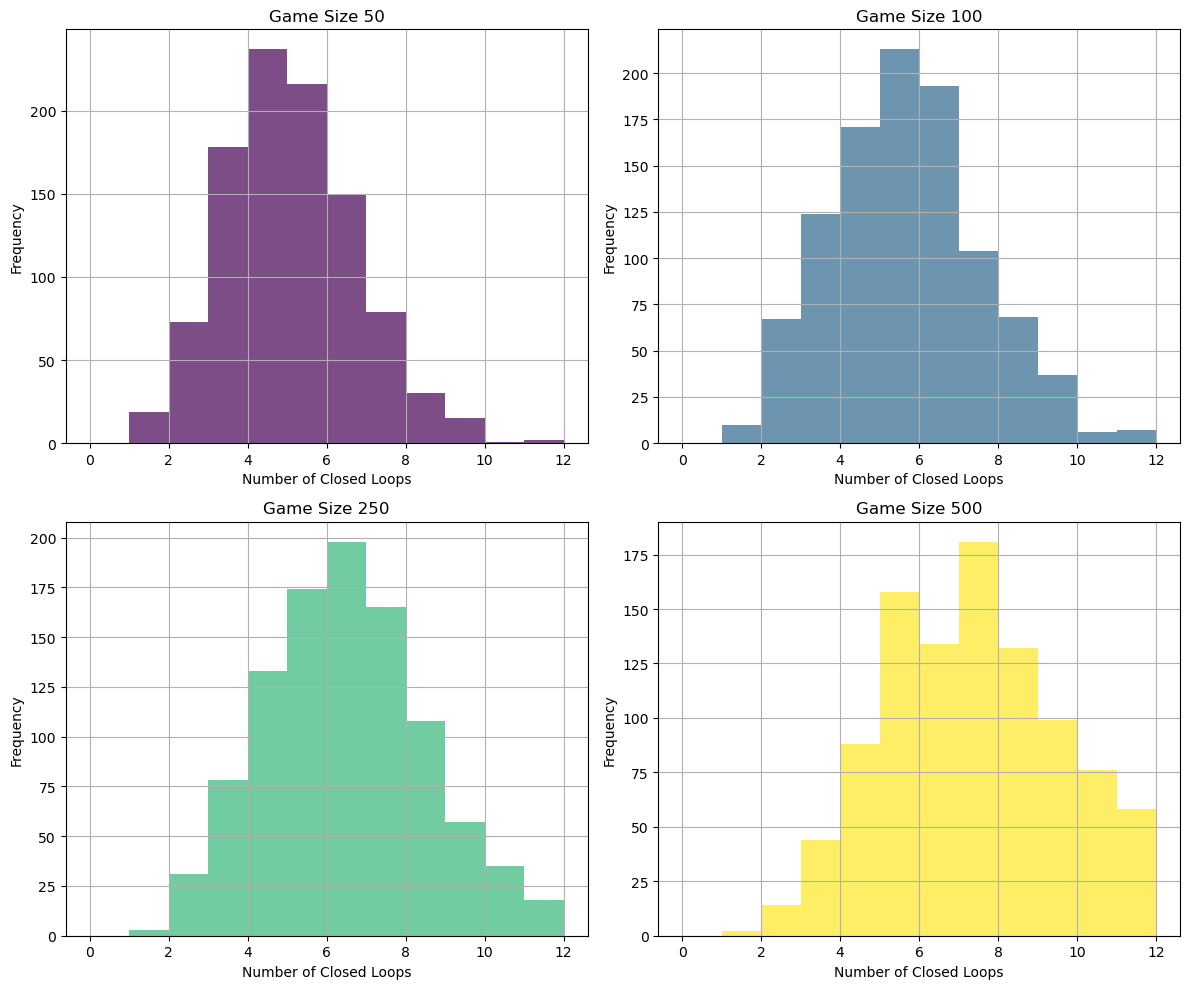


Percentage of obtaining 1 closed loop for each game size:
Game Size 50: 7.30%
Game Size 100: 6.70%
Game Size 250: 3.10%
Game Size 500: 1.40%


In [4]:
def tie(strings, end1, end2): #We define our tie function to decide what is a closed loop and what isn't
    for string in strings: # We first do the scenario if the ends are from the same string
        if end1 in string and end2 in string: #Create an if loop to check if both are in string and then we remove string and add 1 to counter
            strings.remove(string)
            return strings, 1 #Return updated strings bag

    newstring = []  # Now we treat ends from different strings of which we have a few scenarios
    combinedstring = [] #We first create two empty arrays. Whenever we combine two strings we make a new string and so I wanted to store these in here so I can manipulate how the new string is presented
    for string in strings: #Iterate the game
        if end1 in string: #Our first and second part of the loop involves different ends being selected and so it removes the old string in both cases
            string.remove(end1)
            newstring.extend(string) #The extend function allowed for the order in which we combine strings to be maintained and simplify the vectors down
        elif end2 in string:
            string.remove(end2) # I realised this method however was not good enough for my 2 player game later on where I had to measure length so I knew this would have to change
            newstring.extend(string)
        else:
            combinedstring.append(string) #This is where the two ends are appended together and stored in combined strings so that the next iteration of the game can be played.
    combinedstring.append(newstring)
    return combinedstring, 0 #We return the updated game and obviously no closed loops here will be added

def playgame(number): #Now we can define the actual game
    strings = [[i*2+1, i*2+2] for i in range(number)] # We have 2 ends to each string and we want to represent these with consecutive numbers for ease
    closedloops = 0 # Set our closed loop counter to 0
    
    while len(strings) > 1: #Again we run the code up until the final case which we treat separtely.
        end1 = random.choice(strings)[random.randint(0, 1)] #This time there is no user input it's completely random
        end2 = random.choice(strings)[random.randint(0, 1)]# We use random library to first pick a string and then the (0,1) picks the index i.e. which end
        strings, loops = tie(strings, end1, end2) #We then run this past the tie function defined as before and adjust the closed loops accordingly
        closedloops += loops
        
    closedloops += 1 # Final step with only one string left we just add 1 closed loop 
    return closedloops 

gamesize = [50, 100, 250, 500] #Various string game sizes we can check
iterations = 1000 #Run each 1000 times to get a decent amount of results that doesn't crash my computer!
results = {size: [] for size in gamesize} #We store all the results in an array for each game 

for size in gamesize: 
    for _ in range(iterations): #We run each game size through all the iterations and append all results to the dictionary we created of results
        results[size].append(playgame(size))

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # Plot the histogram in 4 subplots and make them look a bit more aesthetic than usual!
colors = plt.cm.viridis(np.linspace(0, 1, len(gamesize))) #This was a technique I learnt in my internship when doing finanical forecasting and thought I'd try it out!

for ax, size, color in zip(axes.flatten(), gamesize, colors):  
    ax.hist(results[size], bins=range(max(max(results.values()))+1), color=color, alpha=0.7) #Prints all results out in histogram format. The bins value is the max value of each game size and then max value of all of them.
    ax.set_title(f'Game Size {size}')
    ax.set_xlabel('Number of Closed Loops') #The usual labels for a histogram
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout() #Plot the histograms
plt.show()

oneloop = {size: results[size].count(1) / iterations * 100 for size in gamesize} #Once I investigated the second question in my rubric, I added this to compute the chance of 1 closed loop

print("\nPercentage of obtaining 1 closed loop for each game size:")
for size, percentage in oneloop.items(): #Returns each item as tuples 
    print(f"Game Size {size}: {percentage:.2f}%") #Prints percentage of 1 loop based off the histogram

In [5]:
#For the 2 player game I did a lot more preparation of how I was going to code this game. I realised we don't actually need two ends we just need the string to be placed in front or after the other string number 
#I can then just count the length based on the number of elements in a string
def playgame(number):
    strings = [[i+1] for i in range(number)]  # Initialize strings as vector arrays, again this made it easier for me to count length

    player = 1 #We start with player 1 
    scores = {1: 0, 2: 0} #Initalise are scores to start at zero for both players
    longestloop = {1: 0, 2: 0}  # Store the longest closed loop length for each player. I created this as mulitple closed loops can be formed but we're concerned about the longest one

    while len(strings) > 1: #We can play the game again until the last string which automatically forms a loop and we check if for that player it's their longest loop
        print("\nCurrent strings:") #Print current strings at each stage
        for i, string in enumerate(strings): #This prints out the format, so once the number of strings is printed we will have String 1: [1], String 2; [2] and so on
            print(f"{i+1}: {string}")

        indices = input(f"Player {player}, enter indices of two strings to combine (e.g., '1 2'): ").split()
        index1, index2 = map(int, indices) #Now this is where I changed my appraoch from before, we just enter the order of the two strings we want to tie (i.e. the index) and it combines the arrays

        if index1 == index2: #If we enter the same string number twice we clearly form a closed loop and so we state this below
            print(f"Player {player} forms a closed loop!")
            looplength = len(strings[index1 - 1]) #We then compute the loop length of this string at the specified index
            if looplength > longestloop[player]: #We then need to check if it's the longest length of this player so we check the previous scores
                longestloop[player] = looplength #If it is then we record this in the scores and carry on playing
            strings.pop(index1 - 1) #The .pop was much more efficent at achieving what I needed for this game and removed the string and returned the rest for the next player 
        else:
            combinedstring = strings[index1 - 1] + strings[index2 - 1] 
            strings.pop(max(index1 - 1, index2 - 1)) #Now if the index was not the same we need to combine the string in such a way that it presents the whole array
            strings.pop(min(index1 - 1, index2 - 1)) #We use these two functions to ensure order is maintained and the indicies removed are correct
            strings.append(combinedstring) #We append the new combined string to the strings bag and repeat the process

        player = 3 - player  # A nifty trick I thought to switch players!

    for j in scores: #Now we look at comparing the scores and ensuring the correct result is printed to scores
        if longestloop[j] > scores[j]: #We then set the longest loop value = to the score for both players
            scores[j] = longestloop[j]

    print("\nAll ends tied. Game is complete!")
    print("Player 1's score:", scores[1]) #Once game is complete, we present both scores and end message
    print("Player 2's score:", scores[2])
    if scores[1] > scores[2]:
        print("Player 1 wins!") #Simple if loop to check who's won and if it's a tie
    elif scores[2] > scores[1]:
        print("Player 2 wins!")
    else:
        print("It's a tie!")

if __name__ == "__main__":        
    number = int(input("Enter the number of strings: "))#The user enters the number of strings in the game
    playgame(number)   #Play the game!!!

Enter the number of strings:  5



Current strings:
1: [1]
2: [2]
3: [3]
4: [4]
5: [5]


Player 1, enter indices of two strings to combine (e.g., '1 2'):  1 1


Player 1 forms a closed loop!

Current strings:
1: [2]
2: [3]
3: [4]
4: [5]


Player 2, enter indices of two strings to combine (e.g., '1 2'):  1 3



Current strings:
1: [3]
2: [5]
3: [2, 4]


Player 1, enter indices of two strings to combine (e.g., '1 2'):  3 2



Current strings:
1: [3]
2: [2, 4, 5]


Player 2, enter indices of two strings to combine (e.g., '1 2'):  2 2


Player 2 forms a closed loop!

All ends tied. Game is complete!
Player 1's score: 1
Player 2's score: 3
Player 2 wins!
